Saving Iris.csv to Iris (3).csv
Data Preview:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

--- KNN Evaluation ---

K = 1
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K = 3
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K = 5
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K = 7
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K = 9
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


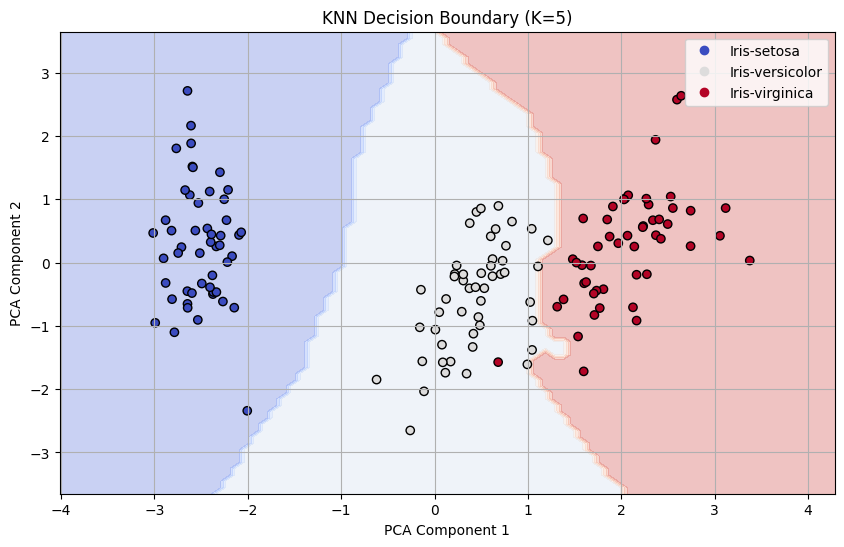

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from google.colab import files  # Use only in Google Colab

# Step 1: Upload dataset
uploaded = files.upload()

# Step 2: Load dataset (target in last column)
filename = next(iter(uploaded))
df = pd.read_csv(filename)

# Step 3: Preview dataset
print("Data Preview:\n", df.head())

# Step 4: Separate features and target
X = df.iloc[:, :-1]   # all columns except last
y = df.iloc[:, -1]    # last column is the target

# Step 5: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 7: Try different values of K
k_values = [1, 3, 5, 7, 9]
print("\n--- KNN Evaluation ---")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nK = {k}")
    print("Accuracy:", round(acc, 3))
    print("Confusion Matrix:\n", cm)

# Step 8: PCA for 2D visualization
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_scaled)

# Step 9: Retrain with best K for visualization (use K = 5)
best_k = 5
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_vis, y)

# Step 10: Create meshgrid for decision boundary
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.1)
)

# Step 11: Predict and prepare decision boundary
Z_raw = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z_numeric, class_names = pd.factorize(Z_raw)
Z = Z_numeric.reshape(xx.shape)

# Step 12: Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=pd.factorize(y)[0], cmap='coolwarm', edgecolor='k')
plt.title(f'KNN Decision Boundary (K={best_k})')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(handles=scatter.legend_elements()[0], labels=list(class_names))
plt.grid(True)
plt.show()
